## Single-disease analysis of alveolar fibroblasts in IPF

This notebook subsets to Alvolar Fibroblasts from our IPF subsetted data as a preparation for the next notebook.

#### Structure

* [Global variables and paths](#bullet1)
* [Loading data](#bullet2)
* [Pre-processing](#bullet3)
* [Main](#bullet4)
* [Conclusions](#bullet5)
* [Save](#bullet6)

### Environment setup

In [1]:
%load_ext autoreload
%autoreload 2
import importlib

spam_spec = importlib.util.find_spec("lab_black")
if spam_spec is not None:
    %load_ext lab_black

In [2]:
# basic modules
import os, re, time
import sys, warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [3]:
# in-house/developing modules
# tools modules
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
7b32b9a39ad70713acde__mypyc NA
PIL                         9.2.0
autoreload                  NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
black                       22.6.0
blib2to3                    NA
cffi                        1.15.1
click                       8.1.3
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.2
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
h5py                        3.7.0
igraph                      0.9.11
ipykernel                   6.15.1
ipython_genutils            0.2.0
jedi                        0.18.1
joblib                      1.1.0
jupyter_server              1.18.1
kiwisolver                  1.4.4
lab_black                   NA
leidenalg                   0.8.10
llvmlite                    0.39.0
matplotlib    

In [4]:
# setting visualisation parameters
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(10, 10))

In [5]:
print("Environment:", re.sub(".os.py", "", os.__file__))
parentpath = lambda _path, n: os.sep.join(_path.split(os.sep)[:-n])
print("Working at:", re.sub(parentpath(os.getcwd(), 2), "", os.getcwd()))

Environment: /home/icb/lisa.sikkema/miniconda3/envs/HLCA_basic/lib/python3.7
Working at: /notebooks/4_disease_analysis


### Global variables and paths

**Inputs**

In [6]:
embed_inp = (
    "../../data/HLCA_extended/extension_disease/scarches_emb_ipf_all-celltypes.h5ad"
)

**Outputs**

In [7]:
embed_out = "../../data/HLCA_extended/extension_disease/scarches_emb_ipf_alveolar-fibroblasts.h5ad"

### Loading data <a class="anchor" id="bullet2"></a>

In [13]:
embed = sc.read(embed_inp)

In [9]:
embed

AnnData object with n_obs × n_vars = 988961 × 30
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new', 'n_genes', 'total_counts', 'lo

### Pre-processing <a class="anchor" id="bullet3"></a>

In [18]:
embed_disease_obs = embed.obs

We're only focusing on the Alveolar Fibroblasts.

In [19]:
embed_disease_celltype_obs = embed_disease_obs[
    embed_disease_obs.transf_ann_level_4_label.isin(["Alveolar fibroblasts"])
]

We will be filtering lowely represented datasets (keeping what has >50 cells).

In [21]:
n_condition = embed_disease_celltype_obs.condition.value_counts()
n_condition

Healthy    16495
IPF         5085
Name: condition, dtype: int64

In [22]:
n_dataset = embed_disease_celltype_obs.dataset.value_counts()
n_dataset

Sheppard_2020                14062
Misharin_2021                 1561
Krasnow_2020                  1523
Kaminski_2020                 1194
Banovich_Kropski_2020         1176
Schiller_2020                  744
Meyer_2019                     723
Lafyatis_Rojas_2019_10Xv2      344
Misharin_Budinger_2018         169
Nawijn_2021                     38
Teichmann_Meyer_2019            38
Lafyatis_Rojas_2019_10Xv1        8
Barbry_Leroy_2020                0
Jain_Misharin_2021_10Xv2         0
Seibold_2020_10Xv2               0
Seibold_2020_10Xv3               0
Jain_Misharin_2021_10Xv1         0
Name: dataset, dtype: int64

In [23]:
embed_disease_celltype_obs = embed_disease_celltype_obs[
    embed_disease_celltype_obs.condition.isin(
        n_condition[n_condition > 50].index.tolist()
    ).tolist()
    and embed_disease_celltype_obs.dataset.astype(str)
    .isin(n_dataset[n_dataset > 50].index.tolist())
    .tolist()
]

In [24]:
pd.crosstab(embed_disease_celltype_obs.study, embed_disease_celltype_obs.condition)

condition,Healthy,IPF
study,,
Banovich_Kropski_2020,826,350
Kaminski_2020,185,1009
Krasnow_2020,1523,0
Lafyatis_Rojas_2019,344,0
Meyer_2019,723,0
Misharin_2021,1561,0
Misharin_Budinger_2018,121,48
Schiller_2020,675,69
Sheppard_2020,10453,3609


subset embed_disease

In [25]:
embed_disease = embed[embed_disease_celltype_obs.index].copy()

In [26]:
embed_disease

AnnData object with n_obs × n_vars = 21496 × 30
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new', 'n_genes', 'total_counts', 'log

Number of alv. fibs in core versus extension:

In [27]:
pd.crosstab(
    embed_disease.obs.transf_ann_level_4_label, embed_disease.obs.core_or_extension
)

core_or_extension,core,extension
transf_ann_level_4_label,,
Alveolar fibroblasts,5098,16398


### Main <a class="anchor" id="bullet4"></a>

Calculate UMAP.

In [29]:
%%time
sc.pp.neighbors(embed_disease, n_neighbors=30)

/home/icb/lisa.sikkema/miniconda3/envs/HLCA_basic/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 29.7 s, sys: 503 ms, total: 30.3 s
Wall time: 29.4 s


In [30]:
%%time
sc.tl.umap(embed_disease)

CPU times: user 22 s, sys: 314 ms, total: 22.3 s
Wall time: 21.7 s


#### Clustering

Try out different levels of clustering:

In [31]:
%%time
sc.tl.leiden(embed_disease, resolution=0.1, key_added="leiden_0.1")

CPU times: user 3.28 s, sys: 103 ms, total: 3.39 s
Wall time: 3.87 s


In [32]:
%%time
sc.tl.leiden(embed_disease, resolution=0.1, key_added="leiden_0.2")

CPU times: user 3.2 s, sys: 106 ms, total: 3.3 s
Wall time: 3.31 s


In [33]:
%%time
sc.tl.leiden(embed_disease, resolution=0.3, key_added="leiden_0.3")

CPU times: user 3.72 s, sys: 91.4 ms, total: 3.81 s
Wall time: 3.82 s


In [34]:
%%time
sc.tl.leiden(embed_disease, resolution=0.5, key_added="leiden_0.5")

CPU times: user 3.91 s, sys: 85.4 ms, total: 3.99 s
Wall time: 4 s


Shuffling indexes for visually random cell order in UMAP plots.

In [35]:
index_list = embed_disease.obs.index.tolist()
np.random.shuffle(index_list)
embed_disease = embed_disease[index_list, :]

plot different clusterings:

use a small figure size for plots not used in the paper:

In [40]:
sc.set_figure_params(figsize=(5, 5))

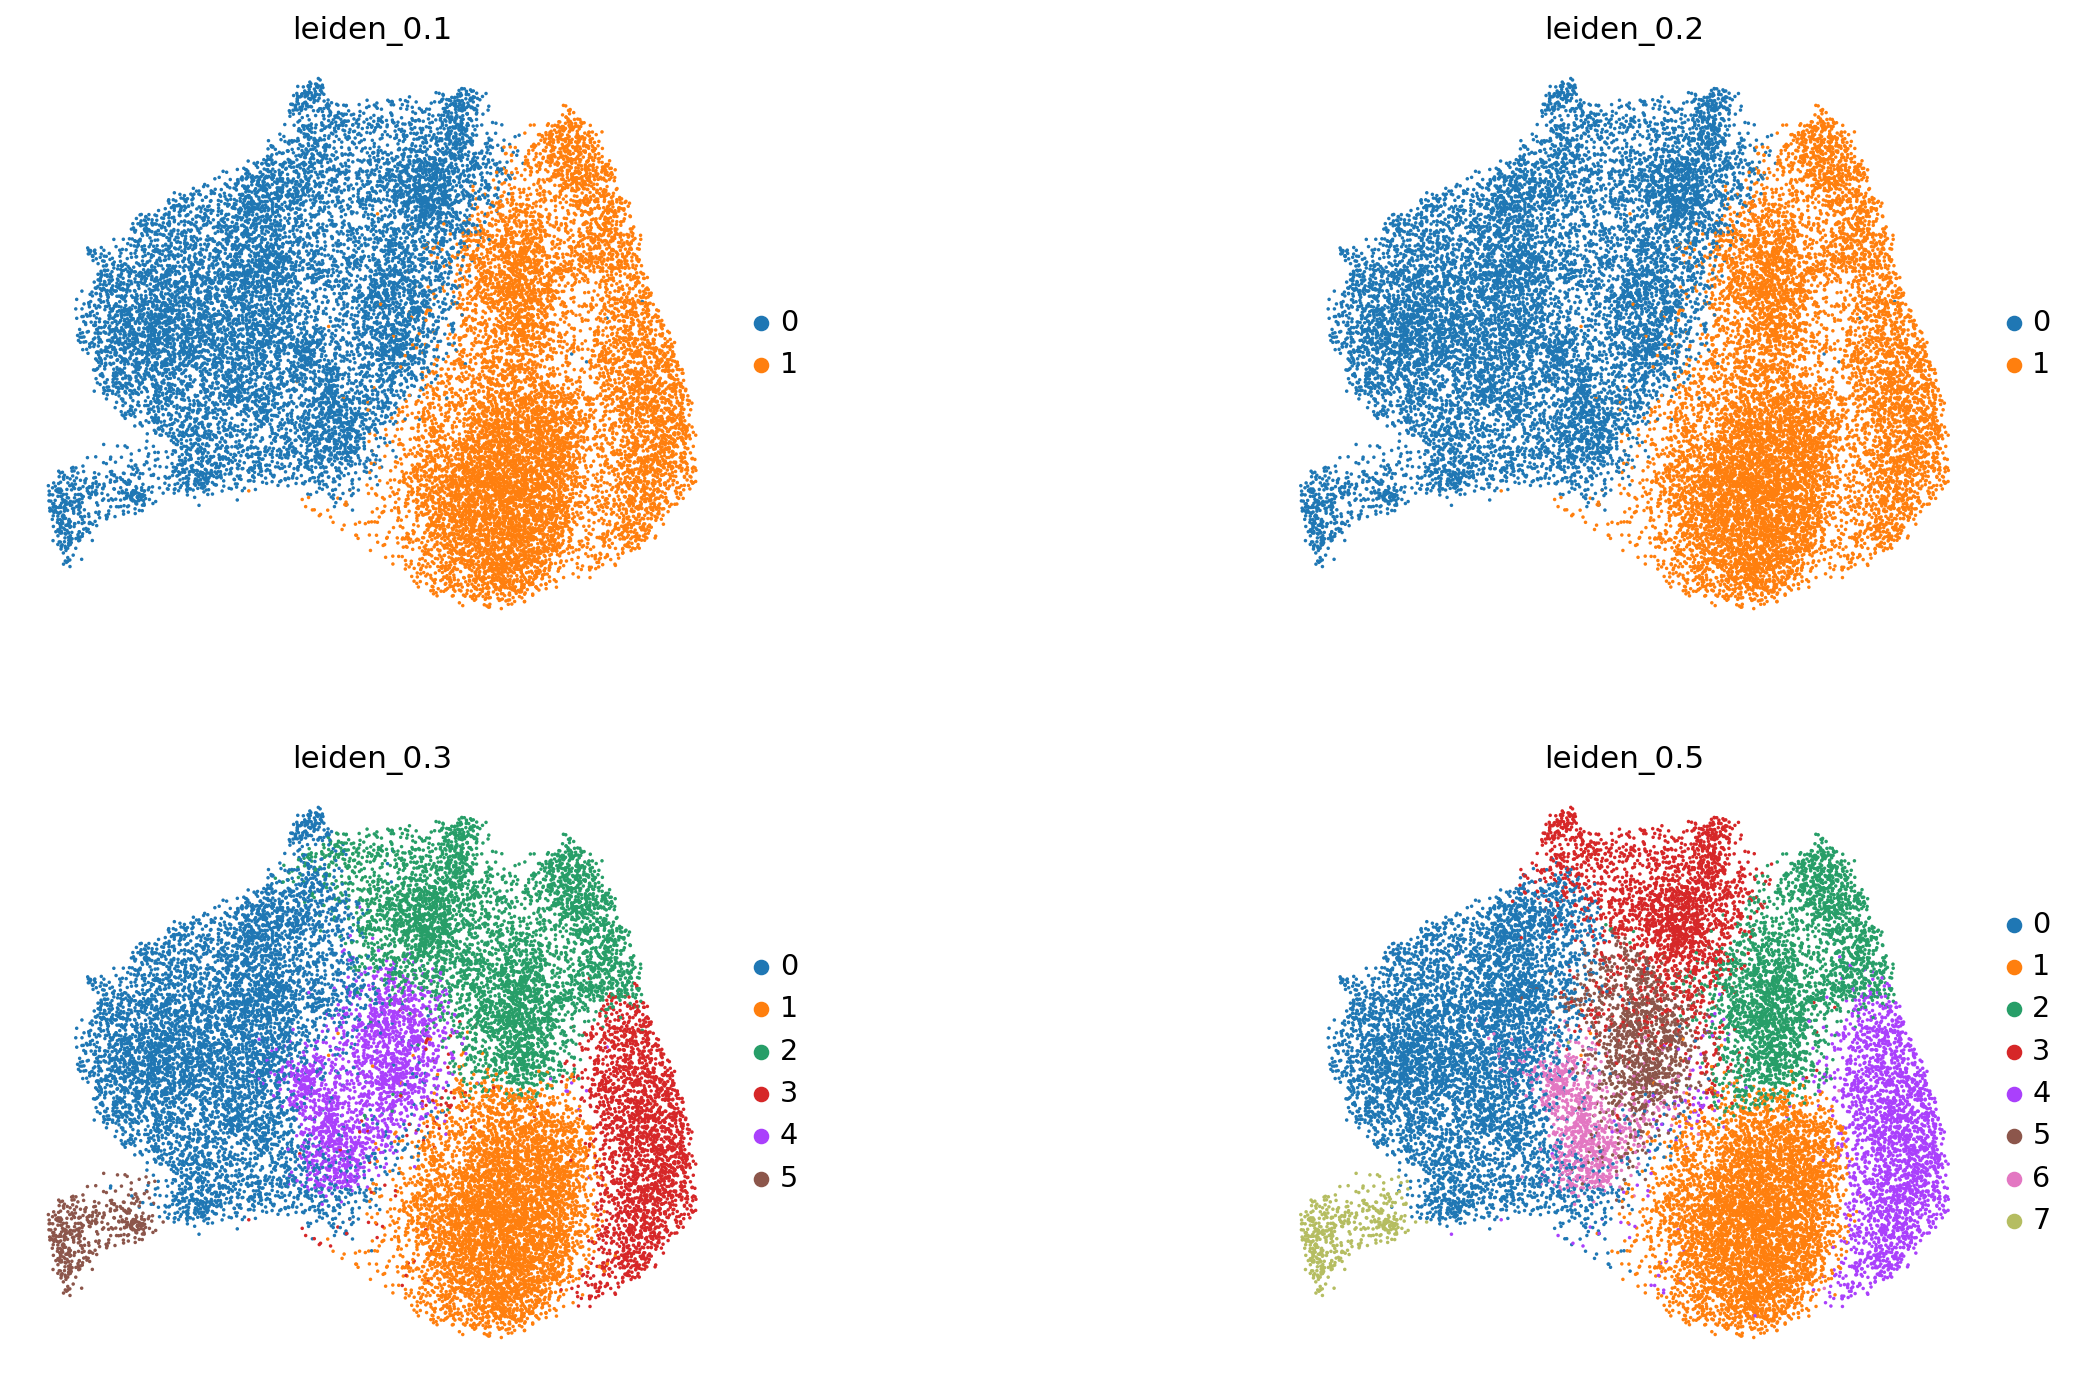

In [42]:
sc.pl.umap(
    adata=embed_disease,
    color=["leiden_0.1", "leiden_0.2", "leiden_0.3", "leiden_0.5"],
    size=10,
    frameon=False,
    wspace=0.6,
    ncols=2,
)

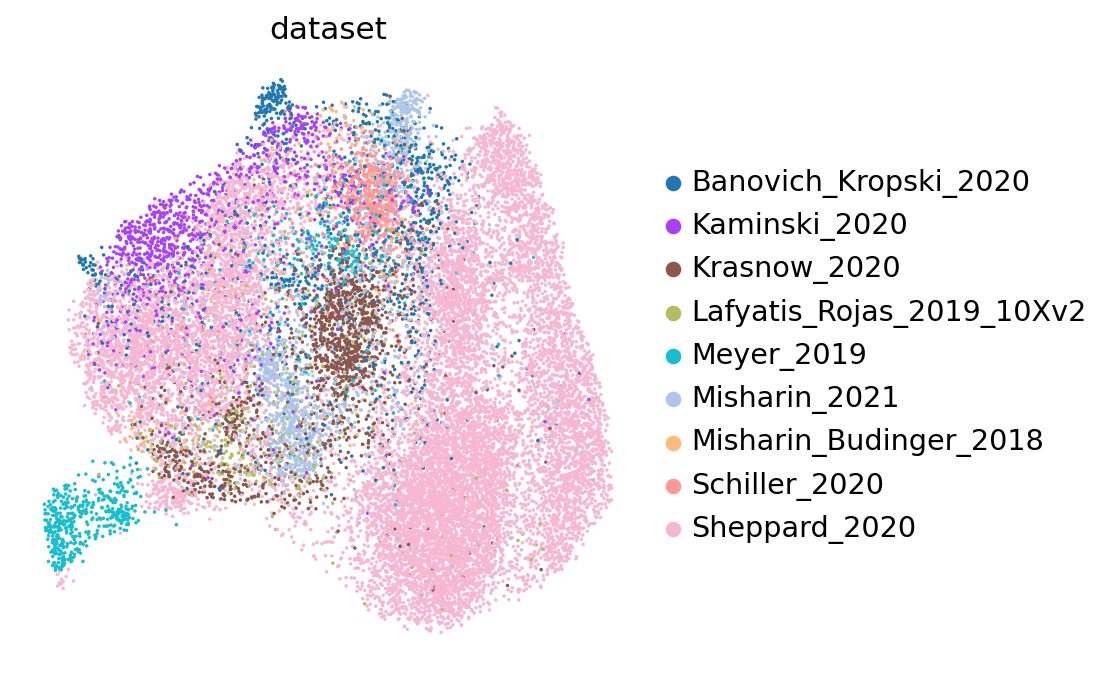

In [43]:
sc.pl.umap(
    adata=embed_disease,
    color=["dataset"],
    size=10,
    frameon=False,
    wspace=0.6,
    ncols=2,
)

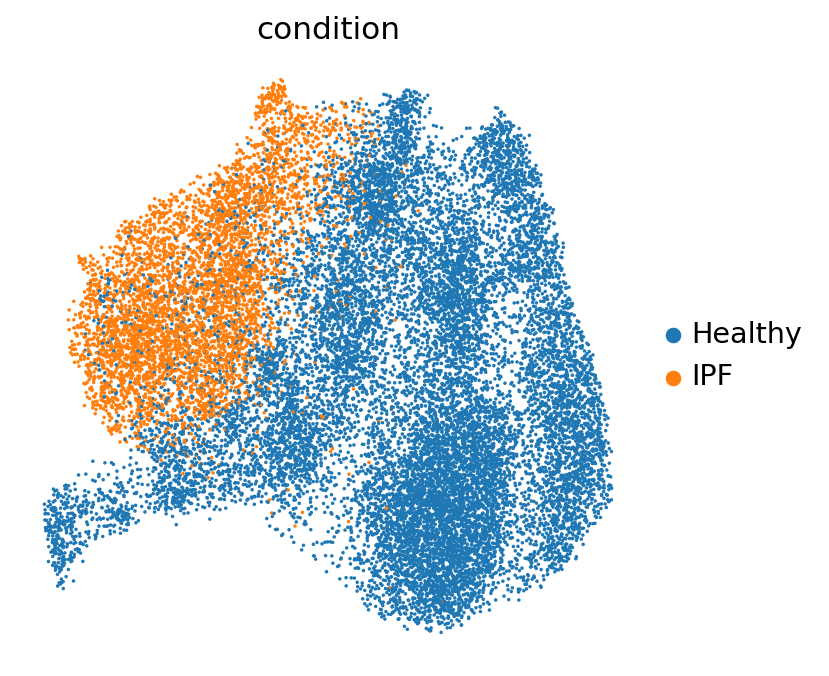

In [44]:
sc.pl.umap(
    adata=embed_disease,
    color=["condition"],
    size=10,
    frameon=False,
    wspace=0.6,
    ncols=2,
)

### Save <a class="anchor" id="bullet6"></a>

In [45]:
embed_disease

AnnData object with n_obs × n_vars = 21496 × 30
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new', 'n_genes', 'total_counts', 'log

In [46]:
print(f"Saving to: {embed_out}")
embed_disease.write(filename=embed_out)

Saving to: ../../data/HLCA_extended/extension_disease/scarches_emb_ipf_alveolar-fibroblasts.h5ad


Done.